In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image

In [2]:
train_dir = 'training_set'
test_dir = 'test_set'

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=32, class_mode='binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [3]:
class_indices =train_generator.class_indices
labels_map = {Class : label for Class, label in class_indices.items()}
labels_map

{'cats': 0, 'dogs': 1}

In [4]:
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in vgg_base.layers:
    layer.trainable = False
    
x = Flatten()(vgg_base.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(inputs=vgg_base.input, outputs=x)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, epochs=5, validation_data=test_generator)

Epoch 1/5
251/251 [==============================] - 1305s 5s/step - loss: 0.4990 - accuracy: 0.8276 - val_loss: 0.2083 - val_accuracy: 0.9061
Epoch 2/5
251/251 [==============================] - 1348s 5s/step - loss: 0.2450 - accuracy: 0.8991 - val_loss: 0.1919 - val_accuracy: 0.9219
Epoch 3/5
251/251 [==============================] - 1341s 5s/step - loss: 0.2379 - accuracy: 0.9011 - val_loss: 0.2091 - val_accuracy: 0.9120
Epoch 4/5
251/251 [==============================] - 1352s 5s/step - loss: 0.2147 - accuracy: 0.9117 - val_loss: 0.1791 - val_accuracy: 0.9259
Epoch 5/5
251/251 [==============================] - 1391s 6s/step - loss: 0.2093 - accuracy: 0.9149 - val_loss: 0.1937 - val_accuracy: 0.9204


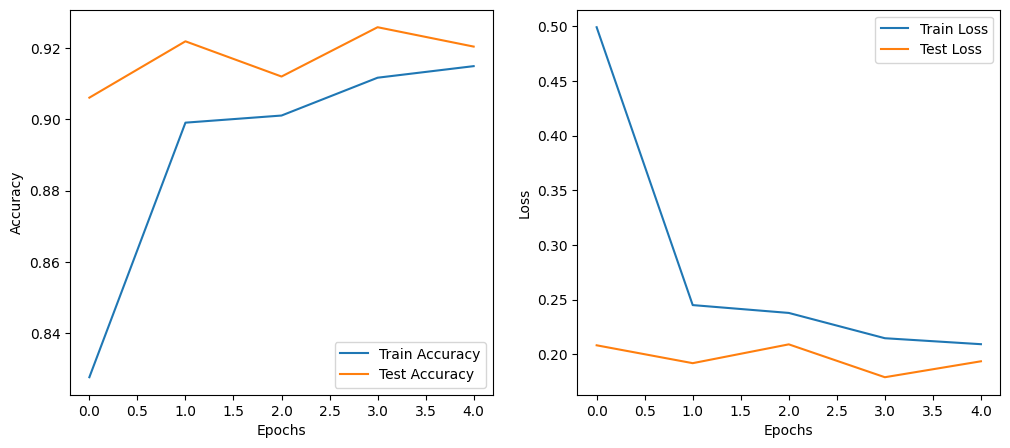

In [5]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [6]:
print('Final Train Accuracy :', history.history['accuracy'][-1])
print('Final Test Accuracy :', history.history['val_accuracy'][-1])

Final Train Accuracy : 0.9149281978607178
Final Test Accuracy : 0.9204152226448059


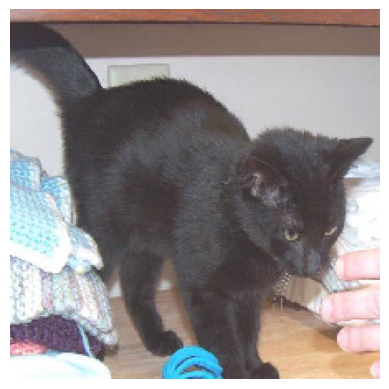

1/1 [==============================] - 0s 225ms/step
Model predicts that it is a : Cat


In [19]:
img_path = random.choice(test_generator.filepaths)
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

plt.imshow(img)
plt.axis('off')
plt.show()

y_pred = model.predict(img_array)
y_pred = y_pred > 0.5

pred = 'Dog' if y_pred else 'Cat'
print('Model predicts that it is a :', pred)